In [2]:
import os
import matplotlib.pyplot as plt
import pandas as pd
freq   = pd.read_csv('run-Acrobot-v2_0624_20-37-22_test-tag-frequency of episodes.csv')
loss   = pd.read_csv('run-Acrobot-v2_0624_20-37-22_test-tag-losses.csv')
reward = pd.read_csv('run-Acrobot-v2_0624_20-37-22_test-tag-reward of episodes.csv')
sigma  = pd.read_csv('run-Acrobot-v2_0624_20-37-22_test-tag-sigma of episodes.csv')

In [26]:
def EMA(data, alpha=0.3):
    result = []
    for i, datum in enumerate(data):
        if i == 0:
            result.append(datum)
        else:
            result.append(alpha*datum+(1-alpha)*result[-1])
    return result

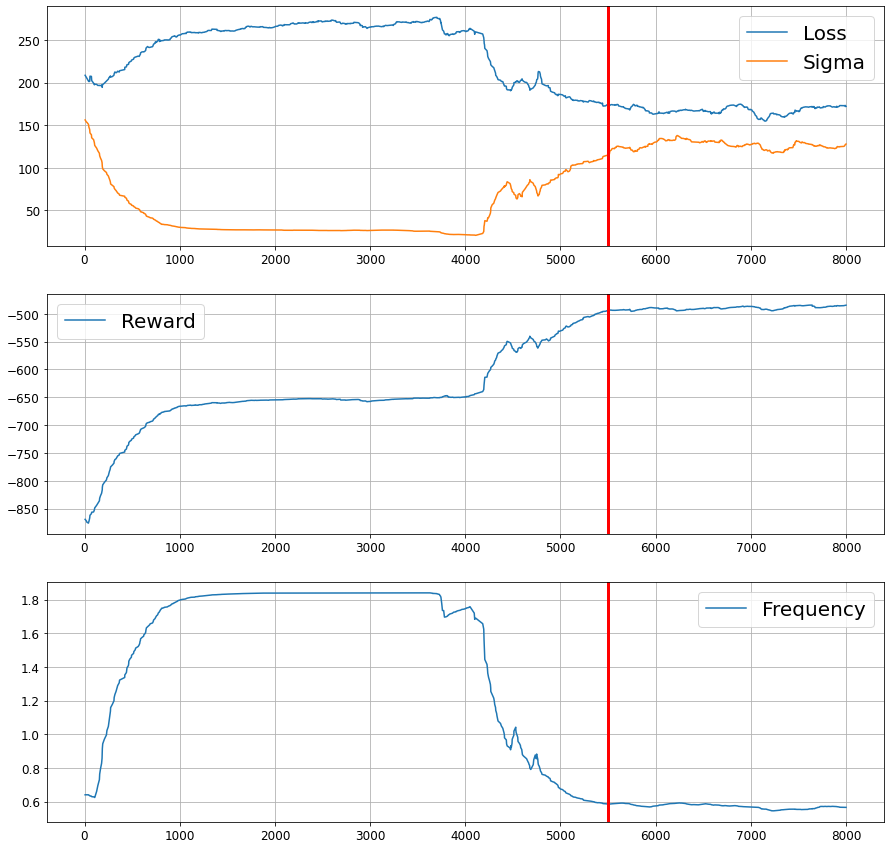

In [49]:
step = freq['Step']
plt.figure(figsize=(15,15))
plt.subplot(3,1,1)
plt.rc('font', size=12)
plt.plot(step, EMA(loss['Value'], 0.03), step, EMA(sigma['Value'],0.03))
plt.legend(['Loss', 'Sigma'], fontsize=20)
plt.axvline(5500, 0, 1, color='red', linewidth=3)
plt.grid(True)

plt.subplot(3,1,2)
plt.plot(step, EMA(reward['Value'],0.03))
plt.legend(['Reward'], fontsize=20)
plt.axvline(5500, 0, 1, color='red', linewidth=3)
plt.rc('font', size=12)
plt.grid(True)

plt.subplot(3,1,3)
plt.plot(step, EMA(freq['Value'],0.03))
plt.legend(['Frequency'], fontsize=20)
plt.axvline(5500, 0, 1, color='red', linewidth=3)
plt.rc('font', size=12)
plt.grid(True)